# ResNet23 data format

Explotation and simulation of probability map used as ground truth for the ResNet23.
 
[*Cell Lineage Tracing in Lens-free Microscopy Videos*, Rempfler et. al.](http://www.andres.sc/publications/rempfler2017miccai.pdf)

In [22]:
import sys
from pathlib import Path
if str(Path().cwd().parents[1]) not in sys.path:
    sys.path.insert(0, str(Path().cwd().parents[1]))

# Main imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from data_preparation import gaussian_kernel, generate_gaussian_mask

In [2]:
# Example canvas size
image_shape = (224, 224)
canvas = np.zeros(image_shape)

# Simulate coordinates
coordinates = np.random.rand(50, 2)
coordinates[:, 0] *= image_shape[0]
coordinates[:, 1] *= image_shape[1]

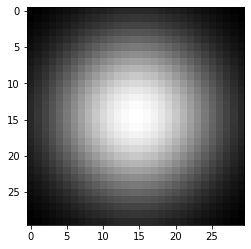

In [63]:
# Define gaussian kernel
k_size, sigma, k_mean = (30, 30), 8, 1
kernel = gaussian_kernel(k_size, sigma, k_mean)
plt.imshow(kernel, cmap=plt.cm.gray);

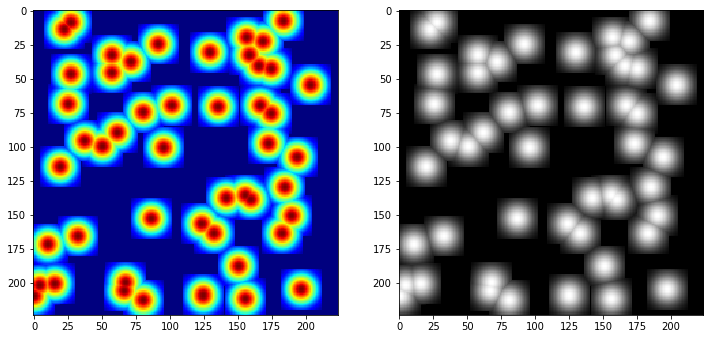

In [42]:
# Apply kernel on generated positions
mask = generate_gaussian_mask(canvas, coordinates, sigma=sigma, kernel_size=k_size)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(mask, plt.cm.jet)
plt.subplot(122)
plt.imshow(mask, plt.cm.gray);

In [70]:
# Add some fancy plots!
def plot_image_surface(img, figsize=(8, 8), xlabel="", ylabel="", zlabel="", zangle=45, xyangle=20, **kwargs):
    """Plot a grayscale image in 3D"""
    h, w = img.shape
    x, y = np.mgrid[0:h, 0:w]
    
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, img, **kwargs)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.view_init(zangle, xyangle)
    
    return fig, ax

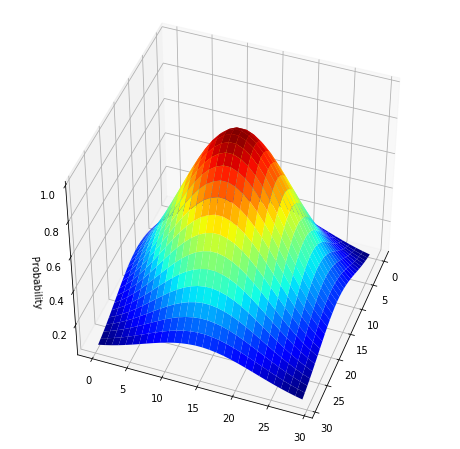

In [74]:
plot_image_surface(kernel, zlabel="Probability", cmap=plt.cm.jet);

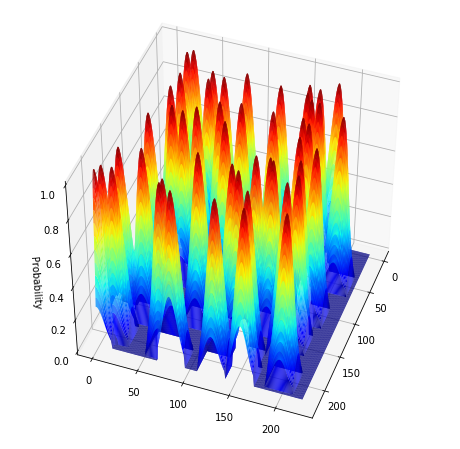

In [75]:
plot_image_surface(mask, zlabel="Probability", rstride=1, cstride=1, cmap=plt.cm.jet);